In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

from sklearn import model_selection
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [9]:
data = pd.read_csv('WA_Fn-UseC_-Sales-Win-Loss.csv')
data.head(3)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1


In [10]:
# change win loss results in Opportunity Result column to win=1 loss=0
data['Opportunity Result'] = data['Opportunity Result'].replace(to_replace=['Won', 'Loss'], value=[1,0])

In [11]:
# create the dummy variables for each region
region_dummies = pd.get_dummies(data.Region, drop_first=True)
supplies_subgroup_dummies = pd.get_dummies(data['Supplies Subgroup'], drop_first=True)
supplies_group_dummies = pd.get_dummies(data['Supplies Group'], drop_first=True)
route_to_mkt_dummies = pd.get_dummies(data['Route To Market'], drop_first=True)
competitor_type_dummies = pd.get_dummies(data['Competitor Type'], drop_first=True)

dummy_data1 = data.merge(region_dummies, right_index=True, left_index=True)
dummy_data2 = dummy_data1.merge(supplies_subgroup_dummies, right_index=True, left_index=True)
dummy_data3 = dummy_data2.merge(supplies_group_dummies, right_index=True, left_index=True)
dummy_data4 = dummy_data3.merge(route_to_mkt_dummies, right_index=True, left_index=True)
dummy_data5 = dummy_data4.merge(competitor_type_dummies, right_index=True, left_index=True)

In [17]:
# uncomment to see new dummy columns
#region_dummies.head()
#dummy_data5.columns

Index(['Opportunity Number', 'Supplies Subgroup', 'Supplies Group', 'Region',
       'Route To Market', 'Elapsed Days In Sales Stage', 'Opportunity Result',
       'Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category', 'Midwest',
       'Northeast', 'Northwest', 'Pacific', 'Southeast', 'Southwest',
       'Car Electronics_x', 'Exterior Accessories', 'Garage & Car Care',
       'Interior Accessories', 'Motorcycle Parts', 'Performance Parts',
       'Replacement Parts', 'Shelters & RV', 'Tires & Wheels_x',
       'Towing & Hitches', 'Car Electronics_y', 'Performance & Non-auto',
       'Tires & Wheels_y', 'Other', 'R

__Drop categorical columns now each their own dummy and drop total days columns to avoid leaky model__

In [19]:
final_data = dummy_data5.drop(columns=['Region', 
                                      'Competitor Type', 
                                      'Supplies Subgroup', 
                                      'Supplies Group', 
                                      'Route To Market',
                                     'Opportunity Number',
                                     'Elapsed Days In Sales Stage',
                                     'Sales Stage Change Count',
                                     'Total Days Identified Through Closing',
                                     'Total Days Identified Through Qualified',
                                     'Ratio Days Identified To Total Days',
                                     'Ratio Days Validated To Total Days',
                                     'Ratio Days Qualified To Total Days'])

In [21]:
final_data.columns

Index(['Opportunity Result', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Deal Size Category', 'Midwest',
       'Northeast', 'Northwest', 'Pacific', 'Southeast', 'Southwest',
       'Car Electronics_x', 'Exterior Accessories', 'Garage & Car Care',
       'Interior Accessories', 'Motorcycle Parts', 'Performance Parts',
       'Replacement Parts', 'Shelters & RV', 'Tires & Wheels_x',
       'Towing & Hitches', 'Car Electronics_y', 'Performance & Non-auto',
       'Tires & Wheels_y', 'Other', 'Reseller', 'Telecoverage', 'Telesales',
       'None', 'Unknown'],
      dtype='object')

In [62]:
final_data.to_csv('clean_data.csv', index=False)

__Try Models for MVP__
K Nearest Neighbors & Logistic Regression

__KNN is the MVP__

In [22]:
# KNN on train set
X_train, X_test, label_train, label_test = train_test_split(final_data, final_data['Opportunity Result'], \
                                                            test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))

The score for kNN is
Training:  90.66%


In [31]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))

The score for logistic regression is
Training:  77.46%


/Users/michaelweber/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__More Models Ensemble__

In [33]:
X = final_data.drop(columns=['Opportunity Result'])
y = final_data['Opportunity Result']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=123)

In [38]:
lr_model = linear_model.LogisticRegression(solver="lbfgs")
nb_model = naive_bayes.GaussianNB()
knn_model = neighbors.KNeighborsClassifier()
svc_model = svm.SVC(probability=True, gamma="scale")
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()

models = ["lr_model", "nb_model", "knn_model", "svc_model", "rf_model", "et_model", "ada_model"]

__RUN ALL THE MODELS **THIS MAY TAKE A WHILE**__

In [39]:
# I tried them all but commented out for ease 

# for model_name in model_names:
#     curr_model = eval(model_name)
#     curr_model.fit(X_train, y_train)
#     print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_model score: 0.7735684626031681
nb_model score: 0.7735684626031681
knn_model score: 0.8083252165889168


KeyboardInterrupt: 

__Chose XGBoost Classifier after research__

__Handling Class Imbalance with ADASYN__

In [41]:
from imblearn.over_sampling import ADASYN
X = final_data.drop(columns=['Opportunity Result']).loc[:]
y = final_data['Opportunity Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train,y_train)

In [44]:
clf_adasyn = XGBClassifier().fit(X_adasyn, y_adasyn)
y_pred_adasyn = clf_adasyn.predict(X_adasyn)

In [47]:
accuracy = accuracy_score(y_adasyn, y_pred_adasyn)
print(f'ADASYN with XGBoost Classifier Model Accuracy: {round(accuracy, 4)*100}')

ADASYN with XGBoost Classifier Model Accuracy: 78.95


In [48]:
print("XG Boost Classifier with ADASYN data")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_adasyn, y_pred_adasyn), 
                                                     recall_score(y_adasyn, y_pred_adasyn)))

XG Boost Classifier with SMOTE data
Precision: 0.8082,   Recall: 0.7600


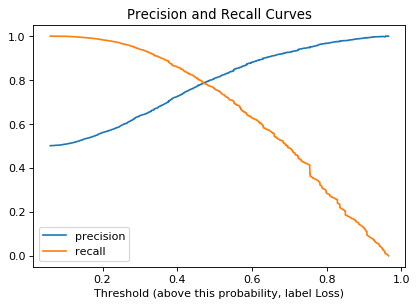

In [49]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_adasyn, clf_adasyn.predict_proba(X_adasyn)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label Loss)');
plt.title('Precision and Recall Curves');

In [52]:
fpr, tpr, thresholds = roc_curve(y_adasyn, clf_adasyn.predict_proba(X_adasyn)[:,1]) 

ROC AUC score =  0.8695045676819161


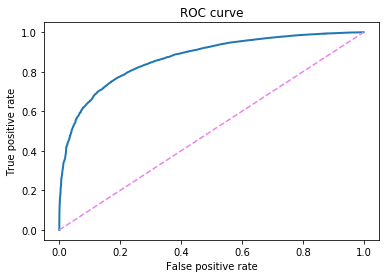

In [53]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_adasyn, clf_adasyn.predict_proba(X_adasyn)[:,1]))

__Tuned the Model Parameters__

In [54]:
xgb_clf_adasyn = XGBClassifier(max_depth=8, learning_rate=.1, n_estimators=100).fit(X_adasyn, y_adasyn)

In [56]:
y_pred_adasyn = clf_adasyn.predict(X_adasyn)
accuracy = accuracy_score(y_adasyn, y_pred_adasyn)
print(f'ADASYN with XGBoost Classifier Model Accuracy: {round(accuracy, 4)*100}')
print("XG Boost Classifier with ADASYN data")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_adasyn, y_pred_adasyn), 
                                                     recall_score(y_adasyn, y_pred_adasyn)))

ADASYN with XGBoost Classifier Model Accuracy: 78.95
XG Boost Classifier with ADASYN data
Precision: 0.8082,   Recall: 0.7600


__Test Set Scores__

In [58]:
xgb_clf_test = XGBClassifier(max_depth=5, 
                                learning_rate=.1, 
                                n_estimators=100, 
                                gamma=0, 
                                min_child_weight=1, 
                                subsample=0.8, 
                                objective='binary:logistic').fit(X_test, y_test)


In [60]:
y_pred_test = xgb_clf_test.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f'ADASYN with XGBoost Classifier Model Accuracy: {round(accuracy, 4)*100}')
print("XG Boost Classifier with TEST data")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_pred_test), 
                                                     recall_score(y_test, y_pred_test)))

ADASYN with XGBoost Classifier Model Accuracy: 83.72
XG Boost Classifier with TEST data
Precision: 0.7986,   Recall: 0.3735


In [ ]:
# import pickle

# with open("/Users/michaelweber/Desktop/DS/Metis/Project McNulty/Project_3/flask_app/clf_adasyn.pkl", "wb") as f:
#     pickle.dump(clf_adasyn, f)

__CatBoost as well__

In [61]:
from catboost import CatBoostClassifier, Pool

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Sales-Win-Loss.csv')
smaller_df = df.drop(columns=['Opportunity Number', 'Elapsed Days In Sales Stage', 'Sales Stage Change Count', 'Total Days Identified Through Closing', 'Total Days Identified Through Qualified', 'Ratio Days Identified To Total Days', 'Ratio Days Validated To Total Days', 'Ratio Days Qualified To Total Days'])
# change win loss results in Opportunity Result column to win=1 loss=0
smaller_df['Opportunity Result'] = smaller_df['Opportunity Result'].replace(to_replace=['Won', 'Loss'], value=[1,0])

In [ ]:
X = smaller_df.drop(columns=['Opportunity Result']).loc[:]
y = smaller_df['Opportunity Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [ ]:
cat_features_index = [0,1,2,3,4,5,6,7,8,9]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

In [ ]:
clf = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=9, \
                            depth=10, iterations= 200, l2_leaf_reg= 9, learning_rate= 0.15)
model = clf.fit(X_train,y_train, cat_features= cat_features_index)

In [ ]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Model Accuracy: {round(accuracy, 4)*100}')
print("CatBoost Classifier")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_pred_train), 
                                                     recall_score(y_train, y_pred_train)))